## **Определение линейной регрессии**
Линейная регрессия (Linear regression) — один из простейший алгоритмов машинного обучения, описывающий зависимость целевой переменной от признака в виде линейной функции $y = kx + b$. В данном случае была представлена простая или парная линейная регрессия, а уравнение вида $f_{w, b}(x) = w_0x_0 + w_1x_1 +... + w_{n}x_{n} + b = w \cdot x + b$ называется множественной линейной регрессией, где $b$ — смещение модели, $w$ — вектор её весов, а $x$ — вектор признаков одного обучающего образца.

К другим условиям определения линейной регрессии относятся гомоскедастичность (дисперсия остатков постоянна и конечна), а также отсутствие мультиколлинеарности (линейной зависимости между признаками).


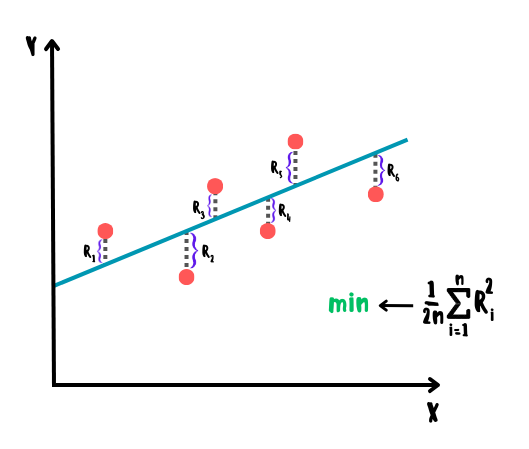

### **Метод наименьших квадратов и функция потерь**
Выбор регрессионной линии (плоскости), описывающей взаимосвязь данных наилучшим образом, заключается в минимизации функции потерь $J$, представленной в виде среднеквадратичной ошибки. Проще говоря, линия должна проходить через данные таким образом, чтобы в среднем разница квадратов ожидаемых и реальных значений была минимальна. Данный метод называется методом наименьших квадратов.

При наличии же большого количества выбросов в данных, более эффективным может оказаться метод наименьших модулей, однако у него есть один серьёзный недостаток: функция модуля не является дифференцируемой в точке $x = 0$, что в ряде случаев может затруднить минимизацию ошибки модели.
Следовательно, исходя из теоремы [Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), метод наименьших квадратов является наиболее оптимальной оценкой параметров модели среди всех линейных и несмещённых оценок за счёт меньшей дисперсии.

**Вывод нормального уравнения (least squares normal equation)**

$J(w, X, y) =
\frac{1}{2n} \sum\limits_{i = 1}^{n} (w^T x_i - y_i)^2 =
\frac{1}{2n} ||X w - y||^{2} =
\frac{1}{2n} (X w - y)^T (X w - y) = \\
= \frac{1}{2n} ((X w)^T X w - (X w)^T y - y^T X w + y^T y) = |(X w)^T y = y^T X w| = \\
= \frac{1}{2n} (w^T X^T X w - 2 y^T X w + y^T y)$

$\frac{\partial J}{\partial w} = 0 \ \ \Rightarrow \ \ \frac{1}{2n} (2X^TX w - 2X^T y) = 0 \ \ \Rightarrow \ \ X^TX w = X^T y
\ \ \Rightarrow \ \ w = (X^TX)^{-1} X^T y$


### **Принцип работы линейной регрессии**
Существуют 2 основных способа обучения линейной регрессии:
- 1) Прямое (нормальное) уравнение в аналитической виде $w = (X^{T}X)^{-1}X^{T} y$, где в данном случае $w$ — вектор весов, включая смещение $b$. Главный недостаток данного способа заключается в высокой вычислительной сложности при большом количестве признаков.
- 2) Итеративная оптимизация с постепенным снижением ошибки модели на основе градиентного спуска и его разновидностей. Именно данный способ чаще всего используется на практике.

**Линейная регрессия на основе градиентного спуска строится следующим образом**:
- 1) изначально устанавливаются нулевые значения для весов, смещения и их градиентов;
- 2) на основе установленных значений делается прогноз;
- 3) на основе полученного прогноза пересчитываются значения весов и смещения, а также снижение их градиентов (разность значений на текущей и предыдущей итерациях);
- 4) шаги 2-3 повторяются до тех пор, пока снижение градиентов не станет меньше заранее установленного порогового значения;
- 5) итоговым прогнозом будет линейная комбинация полученных весов + смещение и признаков на тестовой выборке.

**Формулы для расчётов**

$\begin{align}
\frac{\partial J(\Theta)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 1}^{n} (f_{w ,b}(x_i) - y_i) \\
\frac{\partial J(\Theta)}{\partial w}  &= \frac{1}{n} \sum\limits_{i = 1}^{n} (f_{w ,b}(x_i) - y_i) x_i \\
\end{align}$

$\begin{align} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& b_j = b_{j-1} - \alpha \frac{\partial J(\Theta)}{\partial b_j} \\
& w_j = w_{j-1} - \alpha \frac{\partial J(\Theta)}{\partial w_j}
\newline \rbrace
\end{align}$

$\alpha$ — learning rate

$j$ — current iteration for bias and weights

$\Theta$ — parameters matrix

### **Реализация на Python с нуля**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
class MatrixLinearRegression:

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)   # add ones vector
        XT_X_inv = np.linalg.inv(X.T @ X)   # (X.T * X) ** (-1) inverse matrix
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])   # XT_X_inv * X.T * y
        self.bias, self.weights = weights[0], weights[1:]

    def predict(self, X_test):
        return X_test @ self.weights + self.bias

In [3]:
class GDLinearRegression:
    def __init__(self, learning_rate=0.01, tolerance=1e-8):
        self.learning_rate = learning_rate
        self.tolerance = tolerance

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        while True:
            y_pred = X @ self.weights + self.bias
            db = 1 / n_samples * np.sum(y_pred - y)
            dw = 1 / n_samples * X.T @ (y_pred - y)
            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw

            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        return X_test @ self.weights + self.bias

### **Загрузка датасета**
Для обучения моделей будет использован [Multiple Linear Regression Dataset](https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset), где необходимо спрогнозировать доход сотрудников на основе их возраста и опыта.

In [ ]:
df_path = "/content/drive/MyDrive/income.csv"
income = pd.read_csv(df_path)
X1, y1 = income.iloc[:, :-1].values, income.iloc[:, -1].values
X1_scaled = scale(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
X1_train_s, X1_test_s, y1_train, y1_test = train_test_split(X1_scaled, y1, random_state=0)
print(income)

correlation_matrix = income.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

### **Обучение моделей и оценка полученных результатов**
Как и ожидалось, линейная регрессия показала хорошие результаты в связи с линейной зависимостью в используемых данных. На графике также видно как полученная плоскость хорошо описывает линейную взаимосвязь в данных. Стоит также добавить, что в многомерном пространстве вместо линии или плоскости связь в данных будет описываться гиперплоскостью размерностью $n-1$.

**Linear regression (matrix method)**

In [ ]:
matrix_linear_regression = MatrixLinearRegression()
matrix_linear_regression.fit(X1_train_s, y1_train)
matrix_lr_pred_res = matrix_linear_regression.predict(X1_test_s)
matrix_lr_r2 = r2_score(y1_test, matrix_lr_pred_res)
matrix_lr_mape = mean_absolute_percentage_error(y1_test, matrix_lr_pred_res)

print(f'Matrix Linear regression  R2 score: {matrix_lr_r2}')
print(f'Matrix Linear regression MAPE: {matrix_lr_mape}', '\n')

print(f'weights: {matrix_linear_regression.bias, *matrix_linear_regression.weights}')
print(f'prediction: {matrix_lr_pred_res}')

**Linear regression**

In [ ]:
linear_regression = GDLinearRegression()
linear_regression.fit(X1_train_s, y1_train)
pred_res = linear_regression.predict(X1_test_s)
r2 = r2_score(y1_test, pred_res)
mape = mean_absolute_percentage_error(y1_test, pred_res)

print(f'Linear regression R2 score: {r2}')
print(f'Linear regression MAPE: {mape}', '\n')

print(f'weights: {linear_regression.bias, *linear_regression.weights}')
print(f'prediction: {pred_res}')

**Linear regression (scikit-learn)**

Как можно было заметить, в данном случае получились другие веса так как в предыдущих случаях модели обучались на масштабированных признаках. Если текущую модель обучить на масштабированных признаках, то веса будут такие же как и в случаях выше.

In [ ]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)

sk_lr_pred_res = sk_linear_regression.predict(X1_test)
sk_lr_r2 = r2_score(y1_test, sk_lr_pred_res)
sk_lr_mape = mean_absolute_percentage_error(y1_test, sk_lr_pred_res)

print(f'Scikit-learn Linear regression R2 score: {sk_lr_r2}')
print(f'Scikit-learn Linear regression MAPE: {sk_lr_mape}', '\n')

print(f'weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
print(f'prediction: {sk_lr_pred_res}', '\n')

sk_linear_regression.fit(X1_train_s, y1_train)
print(f'scaled weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')

**Визуализация множественной линейной регрессии с 2 признаками**

In [ ]:
feature1, feature2 = X1[:, 0], X1[:, 1]
X1_linspace = np.linspace(feature1.min(), feature1.max())
X2_linspace = np.linspace(feature2.min(), feature2.max())
X1_surface, X2_surface = np.meshgrid(X1_linspace, X2_linspace)
X_surfaces = np.array([X1_surface.ravel(), X2_surface.ravel()]).T

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)
y_surface = sk_linear_regression.predict(X_surfaces).reshape(X1_surface.shape)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.scatter(feature1, feature2, y1, color='red', marker='o')
ax.plot_surface(X1_surface, X2_surface, y_surface, color='black', alpha=0.6)
plt.title('Fitted linear regression surface')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.view_init(20, 10)
plt.show()

## **Полиномиальная регрессия**
Линейную регрессию также можно применять к данным с нелинейной зависимостью, добавив степени каждого признака в виде новых признаков с последующим обучением на полученном датасете. Такой подход позволяет улавливать линейные связи в многомерном пространстве признаков и называется **полиномиальной регрессией**, а для преобразования признаков в полином степени n в scikit-learn имеется класс PolynomialFeatures, который кроме степеней каждого признака ещё добавляет их комбинации до заданной степени. Например, для признаков $a$ и $b$ со степенью 3 кроме $a^2$, $a^3$ и $b^2$, $b^3$ будут также добавлены их комбинации в виде $ab$, $a^2b$ и $ab^2$.

Стоит отметить, что полиномиальная регрессия всё ещё остаётся линейной, однако на графике в исходном пространстве признаков она будет выглядеть в виде кривой, поскольку полученная гиперплоскость в многомерном пространстве признаков будет соответствовать сложной кривой линии в исходном пространстве.

### **Загрузка датасета**
Для обучения модели будет использован [Ice Cream Selling dataset](https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression) где необходимо выполнить прогнозирование продаж мороженого на основе данных о температуре.

In [ ]:
df_path = "/content/drive/MyDrive/ice_cream_selling.csv"
ice_cream = pd.read_csv(df_path)
X2, y2 = ice_cream.iloc[:, :-1], ice_cream.iloc[:, -1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
print(ice_cream.head())

### **Обучение полиномиальной регрессии и оценка полученных результатов**
Как можно заметить, в данном случае линейная регрессия не способна описать взаимосвязь в исходных данных должным образом и имеет высокую ошибку, однако после добавления полиномиальных признаков результат получился довольно хорошим.

С другой стороны, если использовать полином слишком высокой степени, то модель будет явно переобучена, а если низкой, то недообучена. Для решения данной проблемы необходимо использовать перебор нескольких полиномов для выбора оптимальной кривизны линии, описывающей взаимосвязь в данных наилучшим образом.

In [ ]:
feature_name, target_name = ice_cream.columns
poly_features = PolynomialFeatures(degree=8, include_bias=True)
X2_poly = poly_features.fit_transform(X2)
X2_poly_train, X2_poly_test = train_test_split(X2_poly, random_state=0)

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X2_train, y2_train)
sk_lr_pred_res = sk_linear_regression.predict(X2_test)
sk_lr_pred_all_data_res = sk_linear_regression.predict(X2)

sk_polynomial_regression = LinearRegression()
sk_polynomial_regression.fit(X2_poly_train, y2_train)
sk_poly_lr_pred_res = sk_polynomial_regression.predict(X2_poly_test)
sk_poly_lr_pred_all_data_res = sk_polynomial_regression.predict(X2_poly)

linear_regression_r2 = r2_score(y2_test, sk_lr_pred_res)
polynomial_regression_r2 = r2_score(y2_test, sk_poly_lr_pred_res)

linear_regression_mse = mean_squared_error(y2_test, sk_lr_pred_res)
polynomial_regression_mse = mean_squared_error(y2_test, sk_poly_lr_pred_res)

linear_regression_mape = mean_absolute_percentage_error(y2_test, sk_lr_pred_res)
polynomial_regression_mape = mean_absolute_percentage_error(y2_test, sk_poly_lr_pred_res)

print(f'R2 score (Linear regression): {linear_regression_r2}')
print(f'R2 score (Polynomial regression): {polynomial_regression_r2}', '\n')

print(f'MSE (Linear regression): {linear_regression_mse}')
print(f'MSE (Polynomial regression): {polynomial_regression_mse}', '\n')

print(f'MAPE (Linear regression): {linear_regression_mape}')
print(f'MAPE (Polynomial regression): {polynomial_regression_mape}')

plt.scatter(X2, y2)
plt.plot(X2, sk_lr_pred_all_data_res, color='darkorange', label='Linear Regression')
plt.plot(X2, sk_poly_lr_pred_all_data_res, color='green', label='Polynomial Regression')
plt.title('Polynomial vs Linear regression')
plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.legend()
plt.show()

## **Регуляризация линейной регрессии (Ridge, Lasso, ElasticNet)**
Если в полиномиальной регрессии регуляризация позволяет уменьшить кривизну линии через снижение количества полиномиальных степеней, то в случае с линейной регрессией регуляризация будет заключаться в изменении наклона линии путём ограничения весов модели, обменивая более высокое смещение на низкую дисперсию.

**Гребневая регрессия (Ridge regression)** или *регуляризация Тихонова* применяется в случае мультиколлинеарности через добавление L2-регуляризации к функции потерь во время обучения и сильнее всего занижает веса для признаков с высокой корреляцией: их значения будут приближаться к нулю, но никогда его не достигнут. Лучше всего применять гребневую регрессию после стандартизации признаков.

$J += \alpha \sum \limits_{i=1}^{n} w_i^2$

**Лассо-регрессия (Lasso regression или Least Absolute Shrinkage & Selection Operator)** обычно используется для отбора признаков через добавление L1-регуляризации к функции потерь во время обучения. Проще говоря, лассо-регрессия стремится уменьшить число параметров модели путем зануления весов для неинформативных и избыточных признаков, что на выходе даст разреженную модель (с небольшим числом ненулевых весов признаков).

$J += \alpha \sum \limits_{i=1}^{n} |w_i|$

**Эластичная сеть (ElasticNet)** представляет собой комбинацию L1 и L2-регуляризаций через отношение их смеси $r$, что может принести особую пользу в ситуациях, когда в данных необходимо одновременно выполнять отбор признаков и бороться с мультиколлинеарностью. В Scikit-Learn для управления смесью Ridge и Lasso используется "l1_ratio".

$J = MSE(w) + r\alpha \sum \limits_{i=1}^{n} |w_i| +
\frac{1 - r}{2} \alpha \sum \limits_{i=1}^{n} w_i^2$

Кроме того, в качестве регуляризации линейной регрессии ещё можно использовать **раннюю остановку (early stopping)**, которая заключаются в прекращении обучения модели после определённого количества итераций или достижения заданного уровня ошибки на валидационной выборке. Однако при использовании стохастического или мини-пакетного градиентного спуска в данном случае могут вознинкуть трудности в поиске минимальной ошибки из-за менее гладких кривых обучения.

Стоит также отметить, что приведённые выше методы регуляризации нередко показывают хороший прирост в точности на зашумленных данных, а в случае с полиномиальными признаками можно достичь чуть меньшего искривления линии, что также позволит увеличить обобщающую способность модели.


### **Загрузка датасета**

In [ ]:
X3, y3 = make_regression(n_samples=14, n_features=1, noise=2, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0)
print('X3', X3, sep='\n')
print('y3', y3, sep='\n')

### **Обучение моделей и оценка полученных результатов**
Как можно заметить, в данном случае ElasticNet имеет самую высокую точность среди всех видов регуляризации, что обусловлено лучшим увеличением обобщающей способности за счёт более сильных штрафов во время обучения. На графике ниже видно, что это достигается за счёт более сильного наклона красной линии.

**Linear regression (scikit-learn)**

In [ ]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X3_train, y3_train)

sk_lr_pred_res = sk_linear_regression.predict(X3_test)
sk_lr_pred_train_res = sk_linear_regression.predict(X3_train)

sk_lr_r2 = r2_score(y3_test, sk_lr_pred_res)
sk_lr_train_r2 = r2_score(y3_train, sk_lr_pred_train_res)

sk_lr_mse = mean_squared_error(y3_test, sk_lr_pred_res)
sk_lr_train_mse = mean_squared_error(y3_train, sk_lr_pred_train_res)

sk_lr_mape = mean_absolute_percentage_error(y3_test, sk_lr_pred_res)
sk_lr_train_mape = mean_absolute_percentage_error(y3_train, sk_lr_pred_train_res)

print(f'Linear regression R2 score: {sk_lr_r2}')
print(f'Linear regression train R2 score: {sk_lr_train_r2}', '\n')

print(f'Linear regression MSE: {sk_lr_mse}')
print(f'Linear regression train MSE: {sk_lr_train_mse}', '\n')

print(f'Linear regression MAPE: {sk_lr_mape}')
print(f'Linear regression train MAPE: {sk_lr_train_mape}', '\n')

print(f'prediction: {sk_lr_pred_res}')

**Ridge regression (scikit-learn)**

In [ ]:
sk_ridge_regression = Ridge()
sk_ridge_regression.fit(X3_train, y3_train)

sk_ridge_pred_res = sk_ridge_regression.predict(X3_test)
sk_ridge_pred_train_res = sk_ridge_regression.predict(X3_train)

sk_ridge_r2 = r2_score(y3_test, sk_ridge_pred_res)
sk_ridge_train_r2 = r2_score(y3_train, sk_ridge_pred_train_res)

sk_ridge_mse = mean_squared_error(y3_test, sk_ridge_pred_res)
sk_ridge_train_mse = mean_squared_error(y3_train, sk_ridge_pred_train_res)

sk_ridge_mape = mean_absolute_percentage_error(y3_test, sk_ridge_pred_res)
sk_ridge_train_mape = mean_absolute_percentage_error(y3_train, sk_ridge_pred_train_res)

print(f'Ridge R2 score: {sk_ridge_r2}')
print(f'Ridge train R2 score: {sk_ridge_train_r2}', '\n')

print(f'Ridge MSE: {sk_ridge_mse}')
print(f'Ridge train MSE: {sk_ridge_train_mse}', '\n')

print(f'Ridge MAPE: {sk_ridge_mape}')
print(f'Ridge train MAPE: {sk_ridge_train_mape}', '\n')

print(f'prediction: {sk_ridge_pred_res}')

**Lasso regression (scikit-learn)**

In [ ]:
sk_lasso_regression = Lasso()
sk_lasso_regression.fit(X3_train, y3_train)

sk_lasso_pred_res = sk_lasso_regression.predict(X3_test)
sk_lasso_pred_train_res = sk_lasso_regression.predict(X3_train)

sk_lasso_r2 = r2_score(y3_test, sk_lasso_pred_res)
sk_lasso_train_r2 = r2_score(y3_train, sk_lasso_pred_train_res)

sk_lasso_mse = mean_squared_error(y3_test, sk_lasso_pred_res)
sk_lasso_train_mse = mean_squared_error(y3_train, sk_lasso_pred_train_res)

sk_lasso_mape = mean_absolute_percentage_error(y3_test, sk_lasso_pred_res)
sk_lasso_train_mape = mean_absolute_percentage_error(y3_train, sk_lasso_pred_train_res)

print(f'Lasso R2 score: {sk_lasso_r2}')
print(f'Lasso train R2 score: {sk_lasso_train_r2}', '\n')

print(f'Lasso MSE: {sk_lasso_mse}')
print(f'Lasso train MSE: {sk_lasso_train_mse}', '\n')

print(f'Lasso MAPE: {sk_lasso_mape}')
print(f'Lasso train MAPE: {sk_lasso_train_mape}', '\n')

print(f'prediction: {sk_lasso_pred_res}')

**ElasticNet regression (scikit-learn)**

In [ ]:
sk_elastic_net_regression = ElasticNet()
sk_elastic_net_regression.fit(X3_train, y3_train)

sk_elastic_net_pred_res = sk_elastic_net_regression.predict(X3_test)
sk_elastic_net_pred_train_res = sk_elastic_net_regression.predict(X3_train)

sk_elastic_net_r2 = r2_score(y3_test, sk_elastic_net_pred_res)
sk_elastic_net_train_r2 = r2_score(y3_train, sk_elastic_net_pred_train_res)

sk_elastic_net_mse = mean_squared_error(y3_test, sk_elastic_net_pred_res)
sk_elastic_net_train_mse = mean_squared_error(y3_train, sk_elastic_net_pred_train_res)

sk_elastic_net_mape = mean_absolute_percentage_error(y3_test, sk_elastic_net_pred_res)
sk_elastic_net_train_mape = mean_absolute_percentage_error(y3_train, sk_elastic_net_pred_train_res)

print(f'ElasticNet R2 score: {sk_elastic_net_r2}')
print(f'ElasticNet train R2 score: {sk_elastic_net_train_r2}', '\n')

print(f'ElasticNet MSE: {sk_elastic_net_mse}')
print(f'ElasticNet train MSE: {sk_elastic_net_train_mse}', '\n')

print(f'ElasticNet MAPE: {sk_elastic_net_mape}')
print(f'ElasticNet train MAPE: {sk_elastic_net_train_mape}', '\n')

print(f'prediction: {sk_elastic_net_pred_res}')

**Визуализация снижения ошибок линейной регрессии и её регуляризаций**

In [ ]:
train_r2_scores = [sk_lr_train_r2, sk_ridge_train_r2, sk_lasso_train_r2, sk_elastic_net_train_r2]
test_r2_scores = [sk_lr_r2, sk_ridge_r2, sk_lasso_r2, sk_elastic_net_r2]

train_mses = [sk_lr_train_mse, sk_ridge_train_mse, sk_lasso_train_mse, sk_elastic_net_train_mse]
test_mses = [sk_lr_mse, sk_ridge_mse, sk_lasso_mse, sk_elastic_net_mse]

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.title.set_text('R2 reduction')
ax1.set_xlabel('R2 train')
ax1.set_ylabel('test')
ax1.scatter(train_r2_scores, test_r2_scores, color='red')
ax1.plot(train_r2_scores, test_r2_scores)

ax2 = fig.add_subplot(222)
ax2.title.set_text('MSE reduction')
ax2.set_xlabel('MSE train')
ax2.scatter(train_mses, test_mses, color='red')
ax2.plot(train_mses, test_mses)

In [ ]:
sk_linear_regression_pred_all_data_res = sk_linear_regression.predict(X3)
sk_ridge_regression_pred_all_data_res = sk_ridge_regression.predict(X3)
sk_lasso_regression_pred_all_data_res = sk_lasso_regression.predict(X3)
sk_elastic_net_regression_all_data_pred_res = sk_elastic_net_regression.predict(X3)

plt.scatter(X3, y3, color='black')
plt.plot(X3, sk_linear_regression_pred_all_data_res, label='Linear regression')
plt.plot(X3, sk_ridge_regression_pred_all_data_res, label='Ridge')
plt.plot(X3, sk_lasso_regression_pred_all_data_res, label='Lasso')
plt.plot(X3, sk_elastic_net_regression_all_data_pred_res, label='ElasticNet')
plt.title('Regression regularizations comparison')
plt.xlabel('X3')
plt.ylabel('y3')
plt.legend()
plt.show()

## **Преимущества и недостатки линейной регрессии**
Преимущества:
- простота в реализации и интерпретации;
- высокая скорость работы;
- относительно хорошая точность в случае с линейной зависимостью в данных.

Недостатки:
- низкая гибкость и адаптивность из-за предположения о линейности данных;
- низкая точность в случае с данными сложной формы, что следует из предыдущего пункта;
- чувствительность к шуму и выбросам.

Стоит отметить, что перечисленные недостатки касаются классического случая и могут быть частично либо полностью устранены с помощью вышеописанных методов. Однако на сегодняшний день существует ряд более стабильных и эффективных алгоритмов, применяемых в классическом машинном обучении.

## **Дополнительные источники**
Документация:
- [описание линейных моделей](https://scikit-learn.org/stable/modules/linear_model.html#);
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge);
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso);
- [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet).

Видео про линейную и полиномиальную регрессии: [один](https://www.youtube.com/watch?v=HxXxVuG0xSA), [два](https://www.youtube.com/watch?v=7ArmBVF2dCs).

Видео про регуляризацию: [один](https://www.youtube.com/watch?v=7WTMcm7QobQ), [два](https://www.youtube.com/watch?v=Q81RR3yKn30), [три](https://www.youtube.com/watch?v=NGf0voTMlcs), [четыре](https://www.youtube.com/watch?v=1dKRdX9bfIo), [пять](https://www.youtube.com/watch?v=7WTMcm7QobQ).
